<a href="https://colab.research.google.com/github/alibekk93/IDP_analysis/blob/RAPID/notebooks/cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis

## Setup

In [60]:
!pip install BIO
!sudo apt install clustalw
# !pip install toytree toyplot
!git clone -b RAPID https://github.com/alibekk93/IDP_analysis
!cd /content/IDP_analysis

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalw is already the newest version (2.1+lgpl-7).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
fatal: destination path 'IDP_analysis' already exists and is not an empty directory.


In [61]:
from IDP_analysis.packages_import import *
from IDP_analysis.idp_in_bacteria_functions import *

In [62]:
sns.set_theme(context='paper', style='white',  palette='colorblind')

Loading Tempura dataset

In [63]:
# tempura = pd.read_csv('/content/IDP_analysis/datafiles/tempura/200617_TEMPURA.csv', index_col=0)
# tempura = pd.read_csv('/content/IDP_analysis/datafiles/tempura/tempura_bacteria_uniprot.csv', index_col=0)
tempura = pd.read_csv('/content/IDP_analysis/datafiles/tempura/tempura_filtered.csv', index_col=0)

Only keeping bacteria with available assembly or accession numbers

In [64]:
# tempura = tempura[tempura['superkingdom']=='Bacteria']
# tempura.dropna(subset='assembly_or_accession', inplace=True)
# tempura.reset_index(drop=True, inplace=True)

Classifying bacteria into groups:
1. Psychrophile: OGT <= 20
2. Mesophile: 20 < OGT <= 40
2. Thermophile: 40 < OGT

While this may be quite liberal, some "psychrohiles" with OGT = 20 have *antarctica* in their species name, so it should be fair enough

Psychrophiles would be dropped from this version

In [65]:
tempura = tempura[tempura['Topt_ave'] > 20]
tempura['group'] = ['thermophilic' if t >= 40 else 'mesophilic' for t in tempura['Topt_ave']]

Loading all_proteins

In [66]:
# all_proteins = pd.read_csv('/content/all_proteins.csv', index_col=0)
# all_proteins = pd.read_csv('/content/all_proteins_filtered.csv', index_col=0)
# all_proteins = pd.read_csv('/content/all_proteins_rapid.csv', index_col=0)
# all_proteins = pd.read_csv('/content/all_proteins_types.csv', index_col=0)

Merging all_proteins with temura

In [67]:
# all_proteins = all_proteins.merge(tempura, left_on='Species', right_on='genus_and_species')

setting colors

In [68]:
green = '#1BE434'
red = '#E4341B'

loading cluster data

In [69]:
clusters_df = pd.read_pickle('/content/IDP_analysis/datafiles/clusters/interesting_clusters_fIDPnn.pkl')

In [70]:
clusters_df['fIDPnn_FOD'] = clusters_df['fIDPnn_disorder'].apply(np.mean)
clusters_df['fIDPnn_binary'] = clusters_df['fIDPnn_disorder'].apply(lambda disorder: [r >= 0.5 for r in disorder])
clusters_df['fIDPnn_longest_IDR'] = clusters_df['fIDPnn_binary'].apply(find_longest_binary_IDR)
clusters_df['fIDPnn_with_IDR'] = clusters_df['fIDPnn_longest_IDR'] > 30

## Annotations

In [71]:
# failures = []

# def get_uniprot_info(uniprot_id):
#   url = f'https://rest.uniprot.org/uniprotkb/{uniprot_id}.json'
#   headers = {'Accept': 'application/json'}
#   try:
#     response = requests.get(url, headers)
#     return response.text
#   except:
#     failures.append(uniprot_id)
#     return None

In [72]:
# failures

In [73]:
# tqdm.pandas(desc='Getting data from UniProt')
# uniprot_jsons = clusters_df['ID'].progress_apply(get_uniprot_info)

In [74]:
# with open('uniprot_jsons.pkl', 'wb') as f:
#   pickle.dump(uniprot_jsons, f)

In [75]:
# with open('uniprot_jsons.pkl', 'rb') as f:
#   uniprot_jsons = pickle.load(f)

In [76]:
# uniprot_jsons_loaded = uniprot_jsons.apply(json.loads)

In [77]:
# keywords_dict = {}

# for idx in uniprot_jsons_loaded.index:
#   protein_json = uniprot_jsons_loaded.loc[idx]
#   try:
#     keywords_dict[idx] = pd.DataFrame({kw['category']:[kw['name']] for kw in protein_json['keywords']})
#   except:
#     keywords_dict[idx] = pd.DataFrame({'no_keywords':[True]})

In [78]:
# keywords_df = pd.concat(keywords_dict, ignore_index=True)
# keywords_df.index = keywords_dict.keys()

In [79]:
# keywords_df.to_csv('/content/IDP_analysis/datafiles/clusters/keywords_df.csv')

In [80]:
keywords_df = pd.read_csv('/content/IDP_analysis/datafiles/clusters/keywords_df.csv', index_col=0)

In [81]:
keywords_df.columns

Index(['Cellular component', 'Molecular function', 'Ligand',
       'Biological process', 'PTM', 'no_keywords', 'Technical term', 'Domain'],
      dtype='object')

In [82]:
clusters_df[keywords_df.columns] = keywords_df

In [83]:
clusters_df[keywords_df.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11476 entries, 145 to 1132054
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cellular component  3485 non-null   object
 1   Molecular function  9556 non-null   object
 2   Ligand              4083 non-null   object
 3   Biological process  4290 non-null   object
 4   PTM                 813 non-null    object
 5   no_keywords         375 non-null    object
 6   Technical term      6606 non-null   object
 7   Domain              1472 non-null   object
dtypes: object(8)
memory usage: 806.9+ KB


In [84]:
clusters_df.groupby('Molecular function').size()

Molecular function
Activator                   33
Chaperone                  534
DNA-binding                512
Elongation factor          400
Excision nuclease          199
Hydrolase                  223
Initiation factor           59
Isomerase                   94
Ligase                     348
Lyase                      241
Multifunctional enzyme      14
Nuclease                    18
Oxidoreductase             258
Peroxidase                  62
Protease                   291
RNA-binding                405
Receptor                    11
Repressor                   55
Ribosomal protein         1969
Rotamase                    40
Serine protease             50
Sigma factor               172
Topoisomerase              157
Transferase                740
Translocase                134
rRNA-binding              1796
tRNA-binding               741
dtype: int64

## Cluster alignment

In [85]:
# large_clusters = {cluster:clusters_df[clusters_df['cluster']==cluster] for cluster in clusters_df['cluster'].unique()}

In [86]:
# aligned_clusters = {}

# for cluster, cluster_df in tqdm(large_clusters.items()):
#   try:
#     cluster_df['disorder_aligned'] = align_disorder(disorder_values=cluster_df['fIDPnn_disorder'],
#                                                     seqs=cluster_df['Sequence'], ids=cluster_df['ID'])[1]

#     cluster_df['group'] = [tempura[tempura['genus_and_species']==s]['group'].iloc[0] for s in cluster_df['Species']]

#     cluster_df['color'] = cluster_df['group'].map({'psychrophilic':'blue',
#                                                     'mesophilic':'green',
#                                                     'thermophilic':'red'})
#     cluster_df['species_tag'] = cluster_df['Species']

#     aligned_clusters[cluster] = cluster_df
#   except:
#     aligned_clusters[cluster] = None

In [87]:
# with open('/content/IDP_analysis/datafiles/clusters/aligned_clusters.pkl', 'wb') as f:
#   pickle.dump(aligned_clusters, f)

In [88]:
with open('/content/IDP_analysis/datafiles/clusters/aligned_clusters.pkl', 'rb') as f:
  aligned_clusters = pickle.load(f)

## Cluster analysis

In [89]:
aligned_clusters_df = pd.concat(aligned_clusters)
aligned_clusters_df.index = aligned_clusters_df.index.get_level_values(1)
clusters_df[['disorder_aligned', 'color', 'species_tag']] = aligned_clusters_df[['disorder_aligned', 'color', 'species_tag']]

Finding clusters that are either unique for a group or have combinations

In [90]:
m_only_clusters = {}
t_only_clusters = {}
combination_clusters = {}

for cluster in tqdm(clusters_df['cluster'].unique()):
  cluster_df = clusters_df[clusters_df['cluster']==cluster]
  try:
    groups = cluster_df['group'].unique().tolist()
    if groups == ['mesophilic']:
      m_only_clusters[cluster] = cluster_df
    elif groups == ['thermophilic']:
      t_only_clusters[cluster] = cluster_df
    else:
      combination_clusters[cluster] = cluster_df
  except:
    continue

100%|██████████| 616/616 [00:00<00:00, 1358.72it/s]


In [91]:
print(len(m_only_clusters))
print(len(t_only_clusters))
print(len(combination_clusters))

296
0
320


In [92]:
combination_clusters = pd.concat(combination_clusters, ignore_index=True)

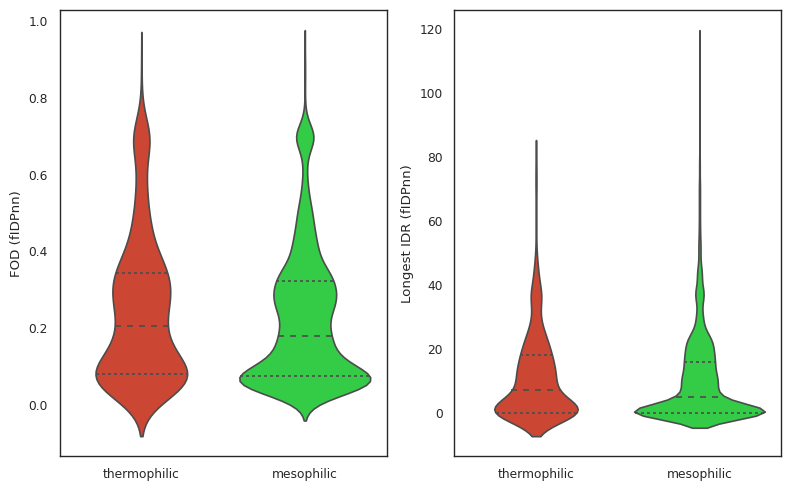

In [93]:
fig, ax = plt.subplots(ncols=2, figsize=(8,5))

sns.violinplot(data=combination_clusters, x='group', y='fIDPnn_FOD', inner='quart', palette=[red, green], ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('FOD (fIDPnn)')

sns.violinplot(data=combination_clusters, x='group', y='fIDPnn_longest_IDR', inner='quart', palette=[red, green], ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Longest IDR (fIDPnn)')

plt.tight_layout()

fig.show()

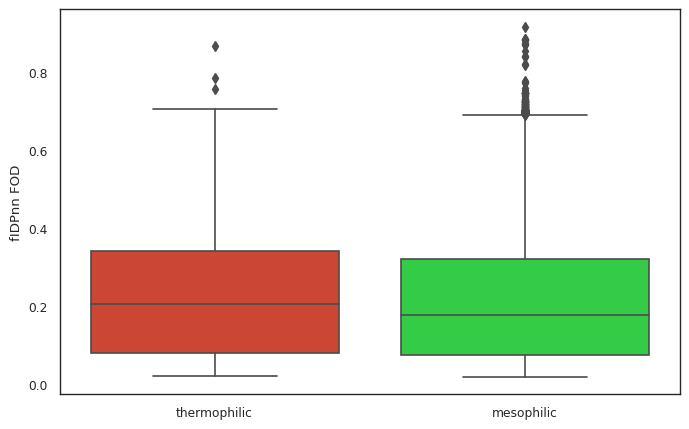

In [94]:
fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(data=combination_clusters, x='group', y='fIDPnn_FOD', palette=[red, green])
ax.set_xlabel('')
ax.set_ylabel('fIDPnn FOD')

fig.show()

In [95]:
scipy.stats.ttest_ind(combination_clusters[combination_clusters['group']=='mesophilic']['fIDPnn_FOD'],
                      combination_clusters[combination_clusters['group']=='thermophilic']['fIDPnn_FOD'])

TtestResult(statistic=-3.02102070077409, pvalue=0.0025280036548684585, df=7269.0)

In [96]:
combination_clusters.groupby('group')['fIDPnn_FOD'].agg(['mean', 'sem'])

,mean,sem
group,,
mesophilic,0.223186,0.002167
thermophilic,0.245459,0.007472


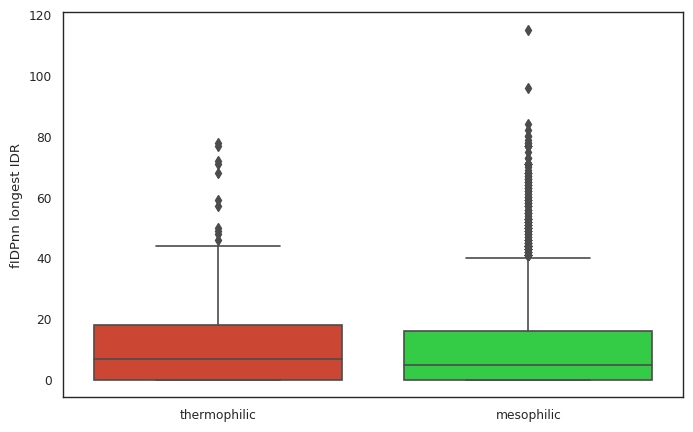

In [97]:
fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(data=combination_clusters, x='group', y='fIDPnn_longest_IDR', palette=[red, green])
ax.set_xlabel('')
ax.set_ylabel('fIDPnn longest IDR')

fig.show()

In [98]:
scipy.stats.ttest_ind(combination_clusters[combination_clusters['group']=='mesophilic']['fIDPnn_longest_IDR'],
                      combination_clusters[combination_clusters['group']=='thermophilic']['fIDPnn_longest_IDR'])

TtestResult(statistic=-1.5870607277313185, pvalue=0.11254238623468454, df=7269.0)

In [99]:
combination_clusters.groupby('group')['fIDPnn_longest_IDR'].agg(['mean', 'sem'])

,mean,sem
group,,
mesophilic,10.225019,0.166705
thermophilic,11.117925,0.526926


In [100]:
disordered_combos = combination_clusters.groupby(['cluster', 'group'], as_index=False)[['fIDPnn_FOD', 'fIDPnn_longest_IDR']].mean()
disordered_combos_std = disordered_combos.groupby('cluster', as_index=False).std()
disordered_combos_std.sort_values('fIDPnn_FOD', ascending=False).head()

,cluster,fIDPnn_FOD,fIDPnn_longest_IDR
94,162959.0,0.215175,9.029210
281,893670.0,0.100280,17.745371
291,908872.0,0.098435,14.418244
88,156791.0,0.095193,3.959798
205,795294.0,0.083705,1.811961


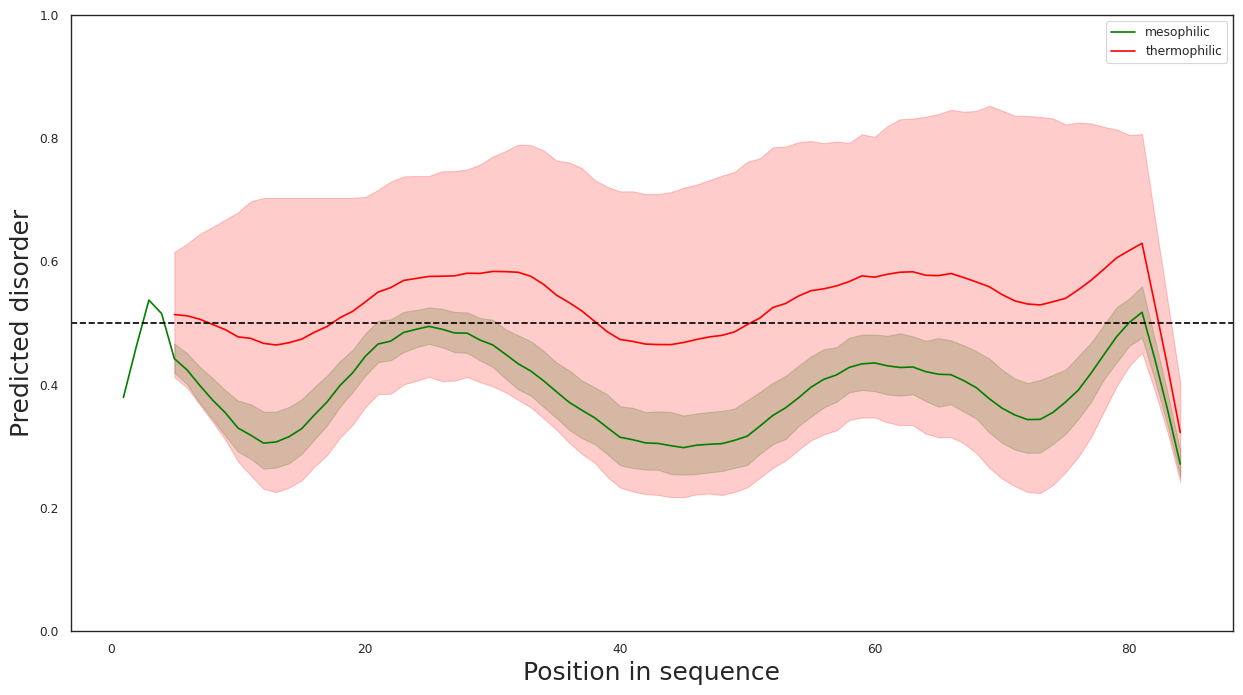

In [101]:
test_cluster = 893670
df = combination_clusters[combination_clusters['cluster']==test_cluster]

plot_aligned_cluster(df=df, cluster=test_cluster, mav=30)

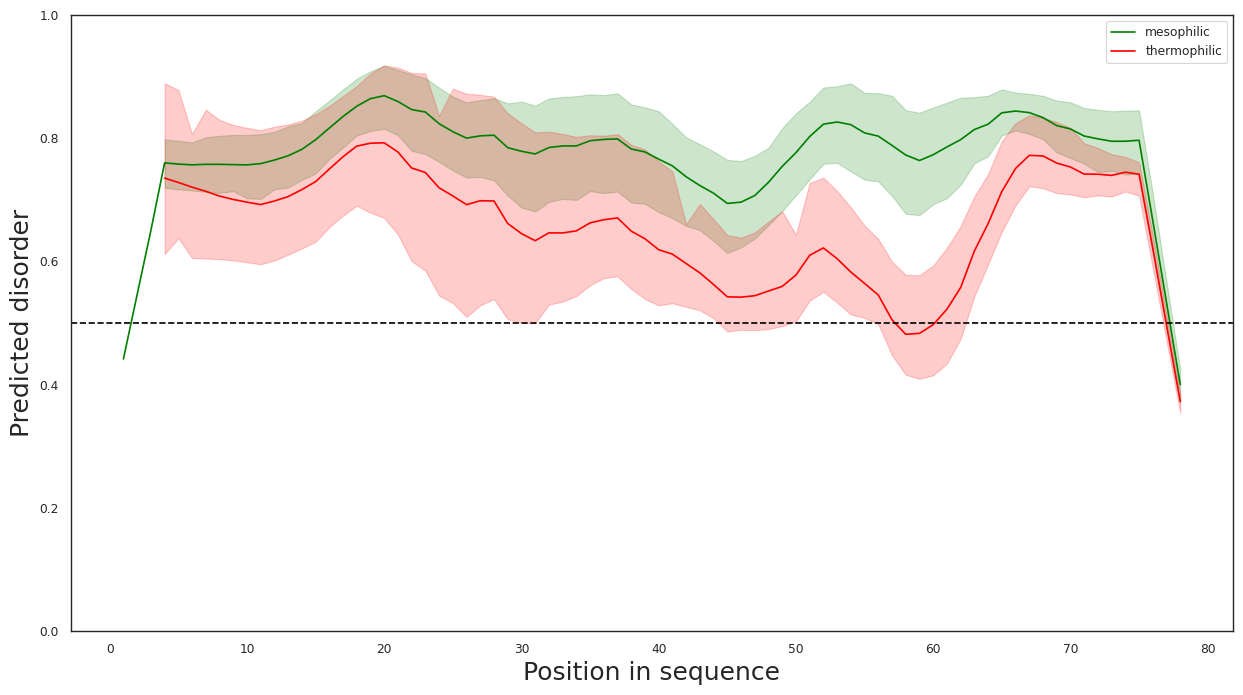

In [102]:
test_cluster = 908872
df = combination_clusters[combination_clusters['cluster']==test_cluster]

plot_aligned_cluster(df=df, cluster=test_cluster, mav=30)

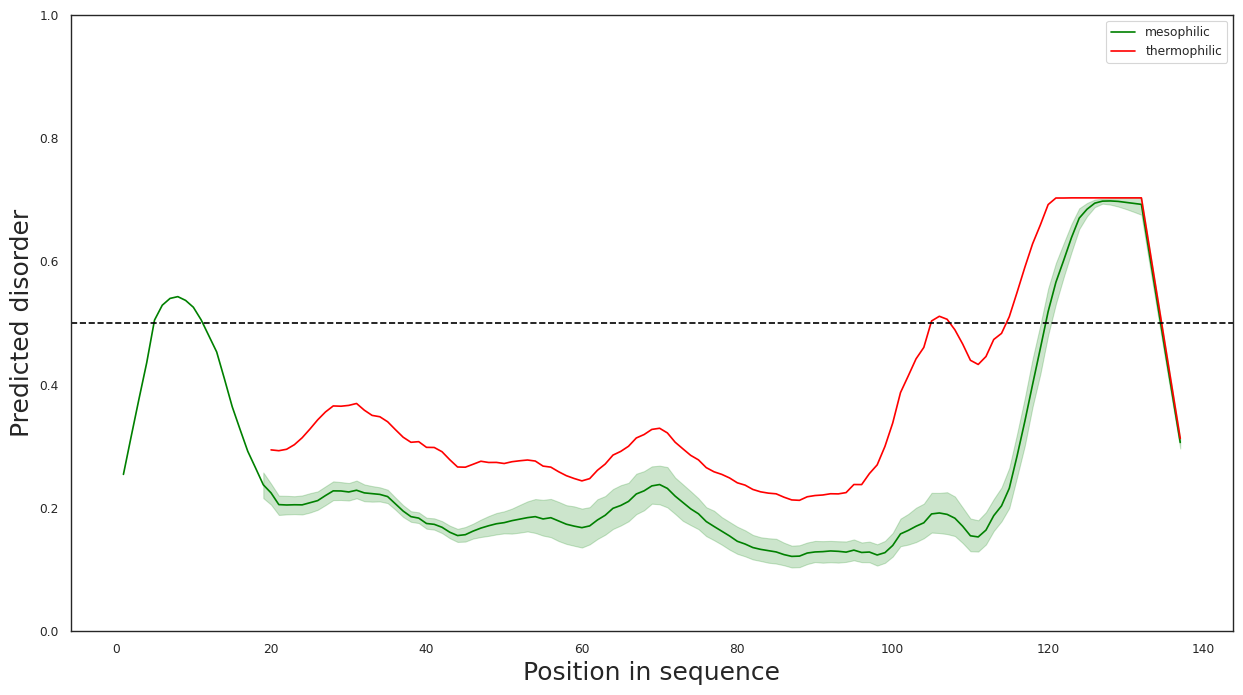

In [103]:
test_cluster = 795294
df = combination_clusters[combination_clusters['cluster']==test_cluster]

plot_aligned_cluster(df=df, cluster=test_cluster, mav=30)

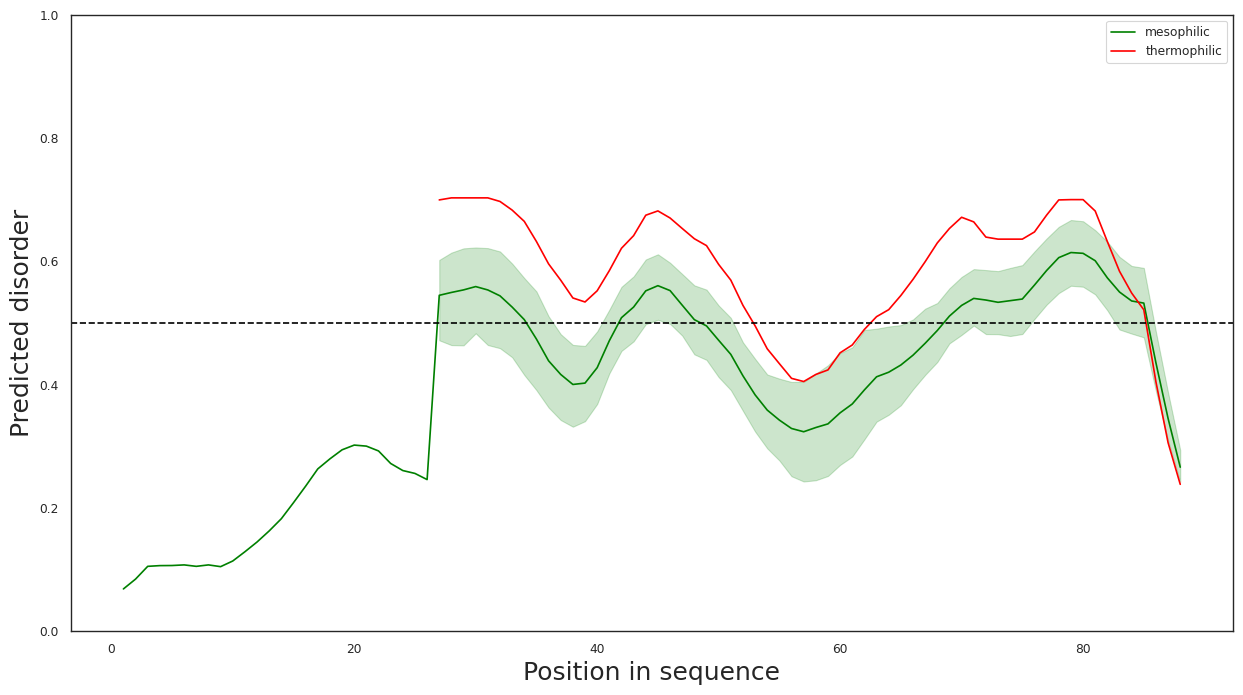

In [104]:
test_cluster = 881579
df = combination_clusters[combination_clusters['cluster']==test_cluster]

plot_aligned_cluster(df=df, cluster=test_cluster, mav=30)

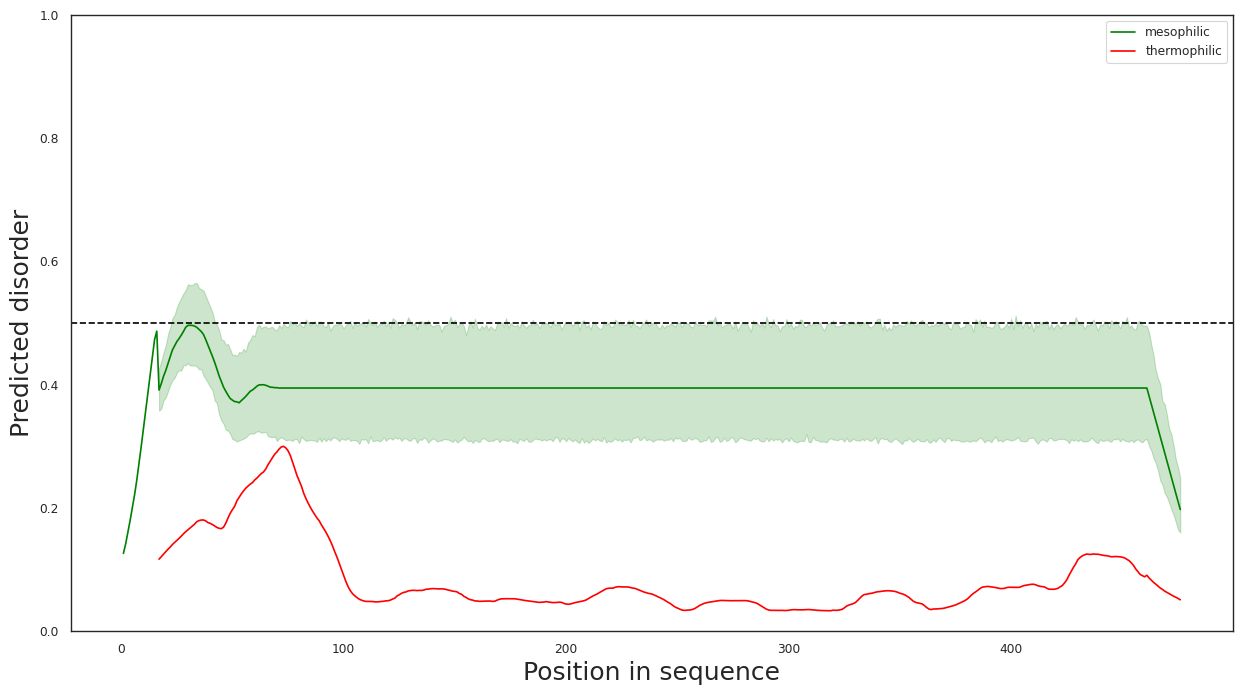

In [105]:
test_cluster = 162959
df = combination_clusters[combination_clusters['cluster']==test_cluster]

plot_aligned_cluster(df=df, cluster=test_cluster, mav=30)

In [106]:
combination_clusters.groupby(['Molecular function']).size()

Molecular function
Activator                    9
Chaperone                  314
DNA-binding                322
Elongation factor          300
Excision nuclease           98
Hydrolase                  177
Initiation factor           38
Isomerase                   24
Ligase                     223
Lyase                      144
Multifunctional enzyme      14
Oxidoreductase             119
Peroxidase                  42
Protease                   160
RNA-binding                259
Receptor                    11
Repressor                   33
Ribosomal protein         1255
Rotamase                    40
Serine protease             17
Sigma factor               109
Topoisomerase               91
Transferase                462
Translocase                 92
rRNA-binding              1189
tRNA-binding               545
dtype: int64

## Cluster analysis - exclusively mesophilic

In [50]:
m_only_clusters = pd.concat(m_only_clusters, ignore_index=True)

In [53]:
def model_cluster(cluster_number, df=clusters_df, plot=False):
  df = df[df['cluster']==cluster_number]
  df = pd.merge(left=df, right=tempura, left_on='Species', right_on='genus_and_species')
  cluster_model = sm.OLS(df['fIDPnn_FOD'], sm.add_constant(df['Topt_ave'])).fit()

  if plot:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.scatterplot(data=df, x='Topt_ave', y='fIDPnn_FOD', color='black', alpha=0.5, ax=ax)
    sns.lineplot(x=df['Topt_ave'], y=cluster_model.predict(sm.add_constant(df['Topt_ave'])), ax=ax, color='red')
    plt.show()
  return (cluster_model.rsquared, cluster_model.params[1])

In [57]:
model_results = {cluster:model_cluster(cluster) for cluster in combination_clusters['cluster'].unique()}
model_results = pd.DataFrame(model_results.values(), columns=['rsq', 'coef'], index=model_results.keys())
model_results.sort_values('rsq')

KeyError: ignored

In [ ]:
model_cluster(73523, plot=True)

In [ ]:
model_cluster(30963, plot=True)

In [ ]:
model_cluster(595740, plot=True)

In [ ]:
model_results['rsq'].mean()

In [ ]:
model_results['coef'].mean()

In [ ]:
clusters_df = pd.merge(left=clusters_df, right=tempura, left_on='Species', right_on='genus_and_species')

In [ ]:
clusters_df['fIDPnn_FOD']

In [ ]:
X = clusters_df['Topt_ave']
y = clusters_df['fIDPnn_FOD']

FOD_OGT_line_model_clusters = sm.OLS(y, sm.add_constant(X)).fit()
print(FOD_OGT_line_model_clusters.summary())

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(data=clusters_df, x='Topt_ave', y='fIDPnn_FOD', color='black', ax=ax, alpha=0.5)
plt.ylabel('Fraction of disorder (fIDPnn)')
plt.xlabel('Optimal growth temperature, °C')

sns.lineplot(x=clusters_df['Topt_ave'], y=FOD_OGT_line_model_clusters.predict(sm.add_constant(clusters_df['Topt_ave'])), ax=ax, color='red')
# sns.lineplot(x=clusters_df['Topt_ave'], y=FOD_OGT_line_model_clusters.predict(sm.add_constant(clusters_df['Topt_ave']**2)), ax=ax, color='green')

plt.tight_layout()

fig.show()
fig.savefig('FOD_OGT_clusters.svg')

In [ ]:
clusters_df

In [ ]:
Entrez.email = "akrug104@uottawa.ca"

def get_protein_info(uniprot_id):
  try:
    handle = Entrez.efetch(db="protein", id=uniprot_id, retmode="xml")
    record = Entrez.read(handle)
    handle.close()
    return record[0]['GBSeq_keywords']
  except:
    return None

In [ ]:
get_protein_info('A4G9U0')

In [ ]:
clusters_df['keywords'] = clusters_df['ID'].apply(get_protein_info)

In [ ]:
clusters_df.loc[205]